## Activity 1: Test normality of data attributes (columns) and carry out

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [0]:
import sklearn as sk
from scipy import stats
from sklearn import preprocessing


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Big-Data-Analysis-with-Python/master/Lesson07/Dataset/bank.csv', sep=';')

In [0]:
DV = 'y'
df[DV]= df[DV].astype('category')
df[DV] = df[DV].cat.codes


In [0]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [0]:
# selecting the target variable (dependent variable) as y
y_train = train[DV]

In [7]:
train = train.drop(columns=[DV])
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure


In [0]:
numeric_df = train._get_numeric_data()

In [9]:
numeric_df_array = np.array(numeric_df)
loop_c = -1
col_for_normalization = list()

for column in numeric_df_array.T:
    loop_c+=1
    x = column
    k2, p = stats.normaltest(x) 
    alpha = 0.001
    print("p = {:g}".format(p))
        
    # rules for printing the normality output
    if p < alpha:
        test_result = "non_normal_distr"
        col_for_normalization.append((loop_c)) # applicable if yeo-johnson is used
        
        #if min(x) > 0: # applicable if box-cox is used
            #col_for_normalization.append((loop_c)) # applicable if box-cox is used
        print("The null hypothesis can be rejected: non-normal distribution")
        
    else:
        test_result = "normal_distr"
        print("The null hypothesis cannot be rejected: normal distribution")


p = 2.33598e-62
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 5.49446e-224
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution


In [0]:
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True, copy=True)

In [0]:
columns_to_normalize = numeric_df[numeric_df.columns[col_for_normalization]]
names_col = list(columns_to_normalize)


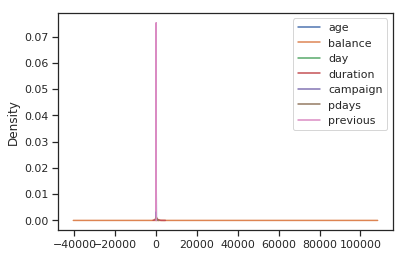

In [12]:
columns_to_normalize.plot.kde(bw_method=3)

In [0]:
normalized_columns = pt.fit_transform(columns_to_normalize)
normalized_columns = pd.DataFrame(normalized_columns, columns=names_col)


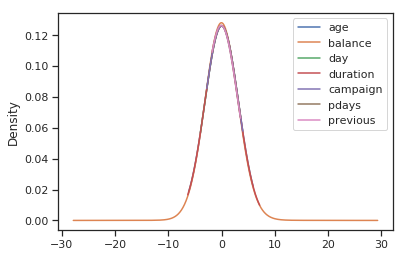

In [14]:
normalized_columns.plot.kde(bw_method=3)

In [15]:
numeric_df_array = np.array(normalized_columns) 
loop_c = -1

for column in numeric_df_array.T:
    loop_c+=1
    x = column
    k2, p = stats.normaltest(x) 
    alpha = 0.001
    print("p = {:g}".format(p))
        
    # rules for printing the normality output
    if p < alpha:
        test_result = "non_normal_distr"
        print("The null hypothesis can be rejected: non-normal distribution")
        
    else:
        test_result = "normal_distr"
        print("The null hypothesis cannot be rejected: normal distribution")


p = 6.92531e-15
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 3.3549e-163
The null hypothesis can be rejected: non-normal distribution
p = 0.00368682
The null hypothesis cannot be rejected: normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 3.23934e-203
The null hypothesis can be rejected: non-normal distribution
p = 3.71822e-203
The null hypothesis can be rejected: non-normal distribution


In [0]:
columns_to_notnormalize = numeric_df
columns_to_notnormalize.drop(columns_to_notnormalize.columns[col_for_normalization], axis=1, inplace=True)


In [0]:
numeric_df_normalized = pd.concat([columns_to_notnormalize.reset_index(drop=True), normalized_columns], axis=1)

In [18]:
numeric_df_normalized

,age,balance,day,duration,campaign,pdays,previous
0,-1.147605,0.269455,0.441428,-0.896344,-1.114326,-0.466160,-0.466205
1,-0.503469,0.119380,0.100113,-0.023957,-1.114326,2.166381,2.058178
2,-1.147605,0.163392,-1.705586,0.056244,1.081869,-0.466160,-0.466205
3,1.523619,-0.450884,-1.367301,0.198252,-1.114326,-0.466160,-0.466205
4,-0.503469,-0.102684,0.873407,-0.314875,0.127873,2.150594,2.191056
5,-0.063880,-0.361454,-1.211372,-0.242610,0.127873,-0.466160,-0.466205
6,0.135787,-0.325014,-0.137567,-1.201453,0.127873,-0.466160,-0.466205
7,0.323905,-0.641746,0.215763,0.574354,-1.114326,2.144841,2.173381
8,-0.063880,2.411425,0.551690,0.414210,-1.114326,-0.466160,-0.466205
9,0.323905,-0.304817,0.215763,-0.543238,0.127873,-0.466160,-0.466205
